# 1) Data Preprocessing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [8]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# drop garbage columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# rename columns
df.columns=['labels','data']

In [15]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# create binary labels 0 and 1

df['b_labels'] = df['labels'].map({'ham':0,'spam':1}) #create new cols
y = df['b_labels'].values

In [17]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(df['data'],y,test_size=0.33)

In [18]:
# convert the sentences to sequences

# data in text, need to apply embedding technique
# backofward 


In [19]:
max_vocab_size=20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [20]:
# fit tokenizer to model
tokenizer.fit_on_texts(X_train)

In [21]:
# convert 
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [23]:
sequence_train[0]

[98, 544, 70, 124, 198, 604]

In [24]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [25]:
sequence_train[1]

[3511,
 514,
 213,
 144,
 33,
 1791,
 105,
 2,
 13,
 3512,
 376,
 3,
 20,
 23,
 984,
 7,
 3513,
 3,
 20,
 2308,
 8,
 4,
 284,
 2309,
 15,
 1293]

In [26]:
# check word index mapping (to check the number of words in vocab)

In [28]:
word2idx = tokenizer.word_index
V =len(word2idx)
print('Total num of unique tokens are : %s'% V)

Total num of unique tokens are : 7195


In [29]:
# pad sequences (to get N x T matrix)
data_train = pad_sequences(sequence_train)
print('Shape of data train tensor:',data_train.shape)

# N: number of samples and T: Number of time steps

Shape of data train tensor: (3733, 189)


In [31]:
data_train[0]
len(data_train[0])

189

In [33]:
len(data_train[1])

189

In [34]:
# set the value of T to get sequence length
T = data_train.shape[1]
print(T)

189


In [35]:
# pad the test set
data_test = pad_sequences(sequence_test,maxlen=T)

# maxlen= T, to truncate longer sentences in test set
print('Shape of data test tensor:',data_test.shape)

Shape of data test tensor: (1839, 189)


# 2) Building the Model

In [36]:
# create convolutional neural network model
# create layer

# choose embedding dimensionality
D  = 20 # this is a hyperparameter, we can choose any word vector size that we want

# Input layer
i = Input(shape = (T,))  # input layer takes in sequences of integers, so shape is T

# Embedding layer
## V = total record
x = Embedding(V+1,D)(i)  # This takes in sequences of integers and returns sequences of word vectors
# This will be an N*T * D array
# we want size of embedding to (V+1) x D, because first word index starts from 1 and not 0

# First CNN layer
## 32 convenrsion features
x = Conv1D(32,3,activation='relu')(x)
x = MaxPooling1D(3)(x)

# Second CNN layer
x = Conv1D(64,3,activation='relu')(x)
x = MaxPooling1D(3)(x)

# Third CNN Layer
x = Conv1D(128,3,activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
## sigmoid - because we are dealing with classification
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [37]:
# Compile the model
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
# Train the model
r = model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test))

Epoch 1/5
117/117 [==============================] - 4s 22ms/step - loss: 0.4800 - accuracy: 0.8571 - val_loss: 0.2727 - val_accuracy: 0.8690

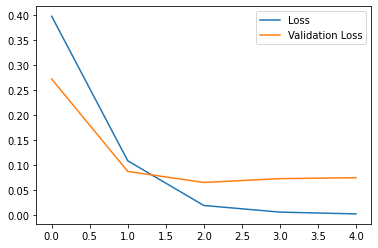

In [39]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()